In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [4]:
data_path= 'OJ.csv'
data=pd.read_csv(data_path)

In [5]:
#Checking for unique values in tha dataset.
print(data.nunique())
labels=data.columns.values
print(labels)
# data.drop(['Unnamed: 0'],inplace=True, axis=1)
data.head()

Purchase            2
WeekofPurchase     52
StoreID             5
PriceCH            10
PriceMM             8
DiscCH             12
DiscMM             12
SpecialCH           2
SpecialMM           2
LoyalCH           553
SalePriceMM        18
SalePriceCH        13
PriceDiff          36
Store7              2
PctDiscMM          18
PctDiscCH          13
ListPriceDiff      18
STORE               5
dtype: int64
['Purchase' 'WeekofPurchase' 'StoreID' 'PriceCH' 'PriceMM' 'DiscCH'
 'DiscMM' 'SpecialCH' 'SpecialMM' 'LoyalCH' 'SalePriceMM' 'SalePriceCH'
 'PriceDiff' 'Store7' 'PctDiscMM' 'PctDiscCH' 'ListPriceDiff' 'STORE']


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [6]:
#Reading the data manually to get some insights into the format of tha data.
print(data.head())
#Finding the unique values in each column.
data.isnull().values.any() #Checking for missing values in the data
print(data.isnull().sum())

  Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000   

In [7]:
#Changing Categorical data to Numerical data
dataset=data.copy()
categorical_columns=data.select_dtypes(include=['object']).columns.tolist() #finding the columns with categorical data
size=len(categorical_columns)
size
category=[] #storing the unique category of each categorical data
for c in categorical_columns:
  category.append(data[c].unique())
for i in range(0,size):
  dataset[categorical_columns[i]]=pd.factorize(dataset[categorical_columns[i]])[0] #changing the value categorical data to numerical data.
data = dataset
data.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [8]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [9]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [10]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<AxesSubplot:>

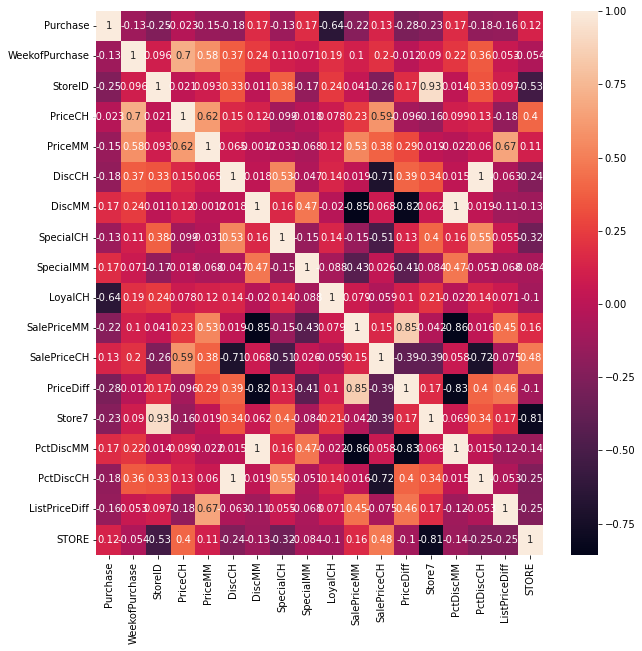

In [13]:
# Making the correlation matrix between the features
plt.figure(figsize=(10,10))
correlation_mat = dataset.corr()
sns.heatmap(correlation_mat, annot = True)


In [15]:
# shuffling the data and splitting it into training and test dataset
dataset.sample(frac=1) 
#storing the predictor variable data in data_x
data_x= dataset.drop('Purchase',axis=1)
data_x=data_x.to_numpy()
#storing the target variable data in data_y
data_y= dataset['Purchase']
data_y=data_y.to_numpy()
#Splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)


LR

In [16]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
def regression_results(y_true, y_pred):
# Regression metrics to find to what extent the predicted and the true values match
    cm = confusion_matrix(y_true,y_pred)
    print(classification_report(y_true,y_pred))
    print(cm)
    # var=metrics.explained_variance_score(y_true, y_pred)
    # MSE=metrics.mean_squared_error(y_true, y_pred) #finding the MSE error between the predicted and the true values
    # R2=metrics.r2_score(y_true, y_pred)
    # print('Explained_variance: ', round(var,5))
    # print('R2_score: ', round(R2,5))
    # print('RMSE: ', round(np.sqrt(MSE),5))

import sklearn.metrics as metrics
LR = LinearRegression() #linear regression model
LR.fit(x_train, y_train)  #feeding training data to the model
pred_train = LR.predict(x_train) #predicting the credit rating using the model

print("Train Data Results Before Feature Selection:")

pred_1 = []
for i in range(len(pred_train)):
  if pred_train[i] <0.5:
    pred_1.append('CH')
  else:
    pred_1.append('MM')

y1 = []
for i in range(len(pred_train)):
  if y_train[i] <0.5:
    y1.append('CH')
  else:
    y1.append('MM')

regression_results(y1,pred_1) # finding the explanatory statistics of the regression model
pred_test= LR.predict(x_test) #predicting the credit rating using the model
pred_test1 = []
for i in range(len(pred_test)):
  if pred_test[i] <0.5:
    pred_test1.append('CH')
  else:
    pred_test1.append('MM')

ytest1 = []
for i in range(len(pred_test)):
  if y_test[i] <0.5:
    ytest1.append('CH')
  else:
    ytest1.append('MM')

print("Test Data Results Before Feature Selection:")
regression_results(ytest1,pred_test1)  # finding the explanatory statistics of the regression model

Train Data Results Before Feature Selection:
              precision    recall  f1-score   support

          CH       0.87      0.88      0.87       464
          MM       0.80      0.79      0.79       285

    accuracy                           0.84       749
   macro avg       0.83      0.83      0.83       749
weighted avg       0.84      0.84      0.84       749

[[406  58]
 [ 59 226]]
Test Data Results Before Feature Selection:
              precision    recall  f1-score   support

          CH       0.83      0.87      0.85       189
          MM       0.80      0.75      0.77       132

    accuracy                           0.82       321
   macro avg       0.82      0.81      0.81       321
weighted avg       0.82      0.82      0.82       321

[[164  25]
 [ 33  99]]


In [17]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)

y_pred_qda_train = qda.predict(x_train)
y_pred_qda_test = qda.predict(x_test)

print('QDA on training Data :\n\n',classification_report(y_train,y_pred_qda_train))
print('\n\nQDA on testing Data :\n\n',classification_report(y_test,y_pred_qda_test))

QDA on training Data :

               precision    recall  f1-score   support

           0       0.68      0.83      0.75       464
           1       0.57      0.38      0.46       285

    accuracy                           0.66       749
   macro avg       0.63      0.60      0.60       749
weighted avg       0.64      0.66      0.64       749



QDA on testing Data :

               precision    recall  f1-score   support

           0       0.70      0.86      0.77       189
           1       0.69      0.46      0.55       132

    accuracy                           0.69       321
   macro avg       0.69      0.66      0.66       321
weighted avg       0.69      0.69      0.68       321



C:\Users\hp\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
